In [ ]:
2.数据清洗
数据清洗data clean相对繁琐、复杂、耗时较多、未必总能程序操作、可能需要个别手工操作。
我们跳过这个部分，直接导入已经清晰好的excel格式数据
可以从如下网址，下载清洗好的数据
https://od.lk/d/165582938_pbgd4/movie150clean.xlsx

3.数据分析


In [15]:
 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '16'}
plt.rc('font', **font) 
plt.rc('axes', unicode_minus=False)

df1 = pd.read_excel('https://od.lk/d/165582938_pbgd4/movie150clean.xlsx', index_col=0)
#df1 = pd.read_excel('D:\\pydata\\douban\\movie150clean.xlsx', index_col=0)
df1.tail(5) 



movie_weblink  \
n                                                 
146   https://movie.douban.com/subject/1307315/   
147  https://movie.douban.com/subject/26628357/   
148   https://movie.douban.com/subject/6307447/   
149   https://movie.douban.com/subject/1295399/   
150   https://movie.douban.com/subject/1395091/   

                                         photo_weblink       cn_name  \
n                                                                      
146  https://img9.doubanio.com/view/photo/s_ratio_p...          哪吒闹海   
147  https://img9.doubanio.com/view/photo/s_ratio_p...  一个叫欧维的男人决定去死   
148  https://img9.doubanio.com/view/photo/s_ratio_p...        被解救的姜戈   
149  https://img9.doubanio.com/view/photo/s_ratio_p...           七武士   
150  https://img9.doubanio.com/view/photo/s_ratio_p...         未麻的部屋   

                  fr_name  rating  numbers         movie_sentence  \
n                                                                   
146                           9.1   208858               想你时你在闹海。   
147  En man som heter Ove     8.9   346098               惠及一生的美丽。   
148      Django Unchained     8.8   499185  热血沸腾，那个低俗、性感的无耻混蛋又来了。   
149                  七人の侍     9.3   158687                  时代悲歌。   
150          Perfect Blue     9.0   242480  好的剧本是，就算你猜到了结局也猜不到全部。   

                                  directors  \
n                                             
146  严定宪 Dingxian Yan / 王树忱 Shuchen Wang      
147                  汉内斯·赫尔姆 Hannes Holm      
148            昆汀·塔伦蒂诺 Quentin Tarantino      
149                   黑泽明 Akira Kurosawa      
150                       今敏 Satoshi Kon      

                                actors  ryear country        theme  
n                                                                   
146                       梁正晖 Zhenghui  1979     中国大陆     冒险 动画 奇幻  
147              罗夫·拉斯加德 Rolf Lassgård  2015       瑞典           剧情  
148                  杰米·福克斯 Jamie Foxx  2012       美国  剧情 动作 西部 冒险  
149                三船敏郎 Toshirô Mifune  1954       日本     动作 冒险 剧情  
150  岩男润子 Junko Iwao / 松本梨香 Rica Matsu  1997       日本     动画 奇幻 惊悚

<AxesSubplot:>

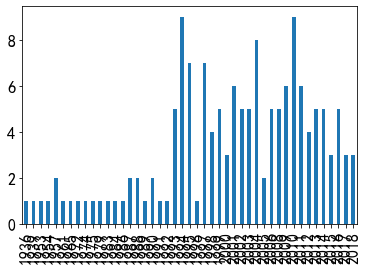

In [16]:
df1['ryear'] = df1['ryear'].astype(int)
df1["ryear"].value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

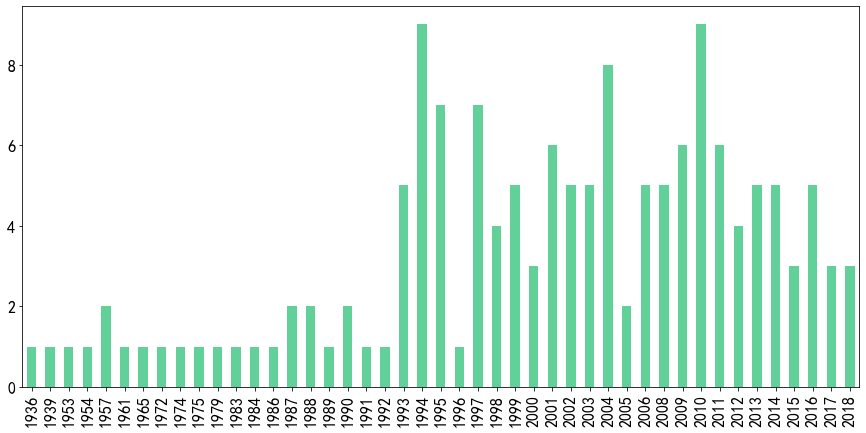

In [17]:
df1["ryear"].value_counts().sort_index().plot(kind="bar",figsize=(15,7),color="#61d199")

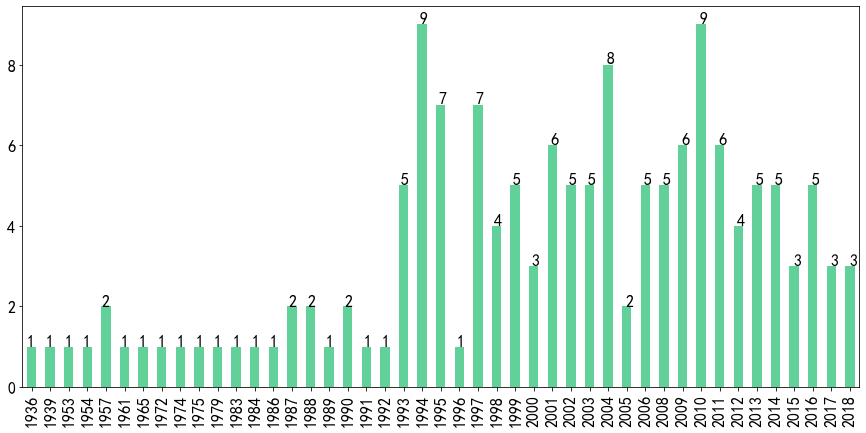

In [18]:
plot1=df1["ryear"].value_counts().sort_index().plot(kind="bar",figsize=(15,7),color="#61d199")
for p in plot1.patches:
    plot1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
 

In [19]:
df_year=df1["ryear"].value_counts().to_frame()
df_year.reset_index(inplace=True)
df_year = df_year.rename(columns = {'index':'year','ryear':'freq'})
df_year['year'] = df_year['year'].astype(int)
print(df_year.columns)
df_year.sort_values(by='year')

Index(['year', 'freq'], dtype='object')


year  freq
44  1936     1
30  1939     1
31  1953     1
32  1954     1
27  1957     2
33  1961     1
34  1965     1
35  1972     1
29  1974     1
37  1975     1
38  1979     1
36  1983     1
39  1984     1
40  1986     1
26  1987     2
25  1988     2
41  1989     1
24  1990     2
42  1991     1
43  1992     1
15  1993     5
0   1994     9
3   1995     7
28  1996     1
4   1997     7
18  1998     4
8   1999     5
22  2000     3
5   2001     6
9   2002     5
10  2003     5
2   2004     8
23  2005     2
12  2006     5
11  2008     5
7   2009     6
1   2010     9
6   2011     6
17  2012     4
13  2013     5
14  2014     5
21  2015     3
16  2016     5
19  2017     3
20  2018     3

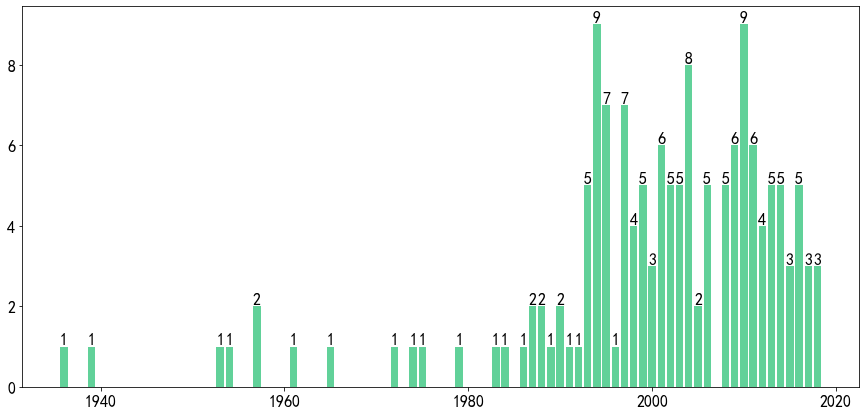

In [20]:
xs =df_year["year"]
ys =df_year["freq"]
plt.figure(figsize=(15,7))
plt.bar(xs, ys, color='#61d199')
# html color codes   https://html-color.codes/
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_yearly.jpg",dpi=600)    #保存图片到本地
plt.show()


In [21]:
df_country=df1['country'].str.split(' ',expand=True)
df_country.head(5)


0     1     2     3     4     5
n                                    
1    美国  None  None  None  None  None
2  中国大陆  中国香港  None  None  None  None
3    美国  None  None  None  None  None
4    法国    美国  None  None  None  None
5    美国   墨西哥  澳大利亚   加拿大  None  None

In [22]:
df_country1=df_country.stack().value_counts().to_frame()
df_country1.reset_index(inplace=True)
df_country1 = df_country1.rename(columns = {'index':'country',0:'freq'})
print(df_country1.columns)
df_country1.sort_values(by='freq',ascending=False)



Index(['country', 'freq'], dtype='object')


country  freq
0       美国    84
1       日本    22
2       英国    19
3     中国香港    15
4     中国大陆    14
5       法国    12
6       德国     9
7       韩国     9
8      意大利     8
9      加拿大     6
12      瑞士     3
13    中国台湾     3
11    澳大利亚     3
10     新西兰     3
14      印度     2
15      瑞典     2
16     黎巴嫩     1
17     卡塔尔     1
18      荷兰     1
19      波兰     1
20      丹麦     1
21      巴西     1
22     奥地利     1
23      伊朗     1
24     西班牙     1
25     墨西哥     1
26    塞浦路斯     1

In [23]:
df_country1.to_excel('D:\\pydata\\douban\\movie_country.xlsx')

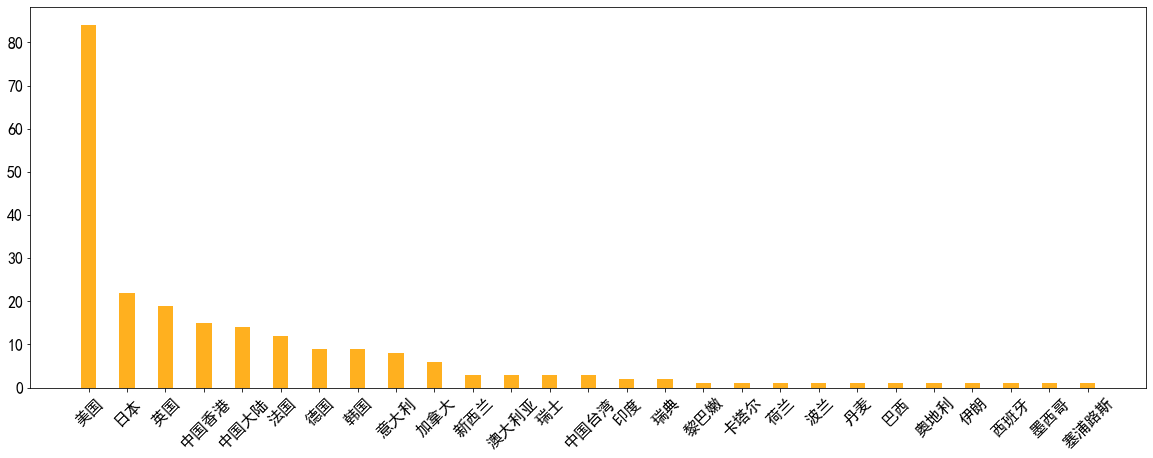

In [24]:
xs =df_country1["country"]
ys = df_country1["freq"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)

plt.show()

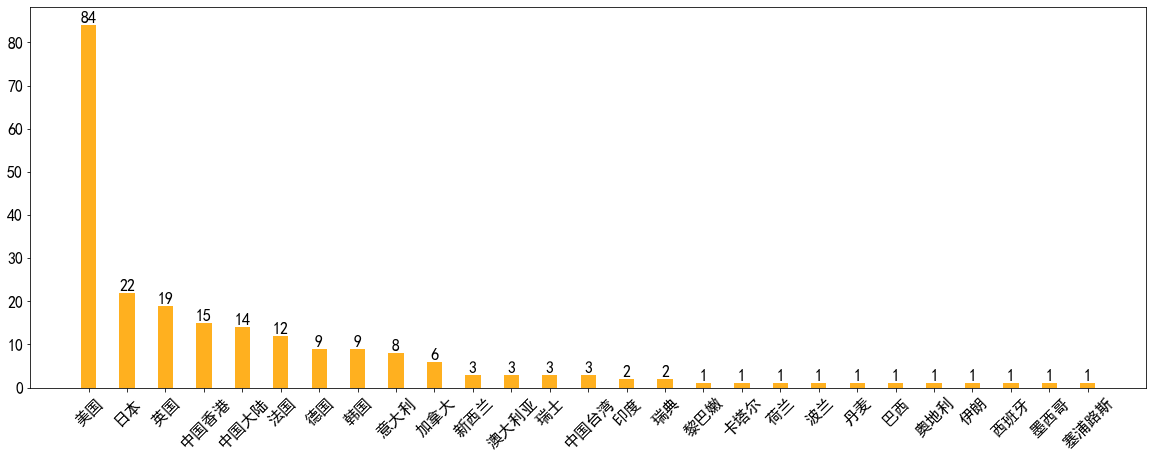

In [26]:

xs =df_country1["country"]
ys = df_country1["freq"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)


for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_region.jpg",dpi=600)    #保存图片到本地
plt.show()

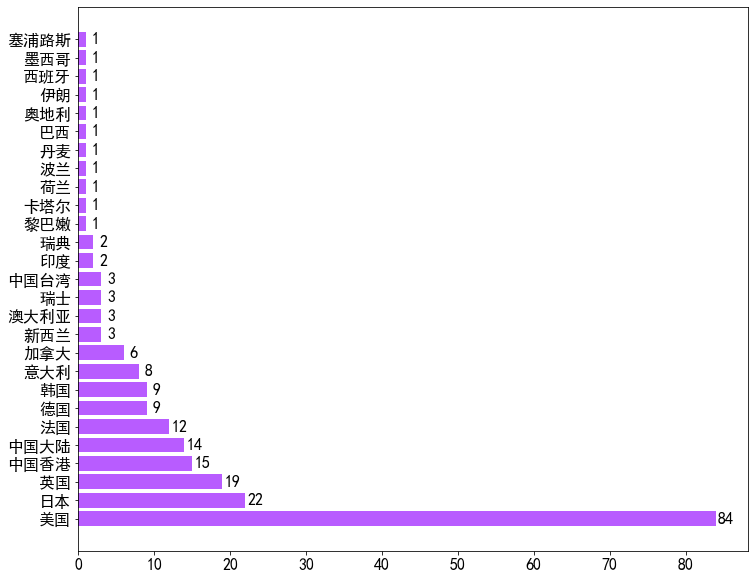

In [27]:
plt.figure(figsize=(12,10))
plt.barh(xs,ys,color='#b85cff')
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_region2.jpg",dpi=600)    #保存图片到本地    
plt.show()

In [28]:
df_theme=df1['theme'].str.split(' ',expand=True)
df_theme.head(5)

0   1     2     3     4
n                          
1  犯罪  剧情  None  None  None
2  剧情  爱情    同性  None  None
3  剧情  爱情  None  None  None
4  剧情  动作    犯罪  None  None
5  剧情  爱情    灾难  None  None

In [29]:
df_theme1=df_theme.stack().value_counts().to_frame()
df_theme1['theme']=df_theme1.index
df_theme1 = df_theme1.rename(columns = {1:'theme',0:'freq'})
print(df_theme1.columns)
df_theme1

Index(['freq', 'theme'], dtype='object')


freq theme
剧情    114    剧情
爱情     34    爱情
喜剧     34    喜剧
奇幻     33    奇幻
冒险     32    冒险
动画     24    动画
犯罪     21    犯罪
动作     18    动作
惊悚     17    惊悚
悬疑     16    悬疑
科幻     11    科幻
家庭     10    家庭
传记     10    传记
战争      9    战争
历史      6    历史
古装      5    古装
音乐      5    音乐
同性      4    同性
歌舞      4    歌舞
儿童      2    儿童
武侠      2    武侠
灾难      2    灾难
西部      2    西部
纪录片     2   纪录片
情色      1    情色
运动      1    运动

In [30]:
df_theme1.to_excel('D:\\pydata\\douban\\df_theme1.xlsx')

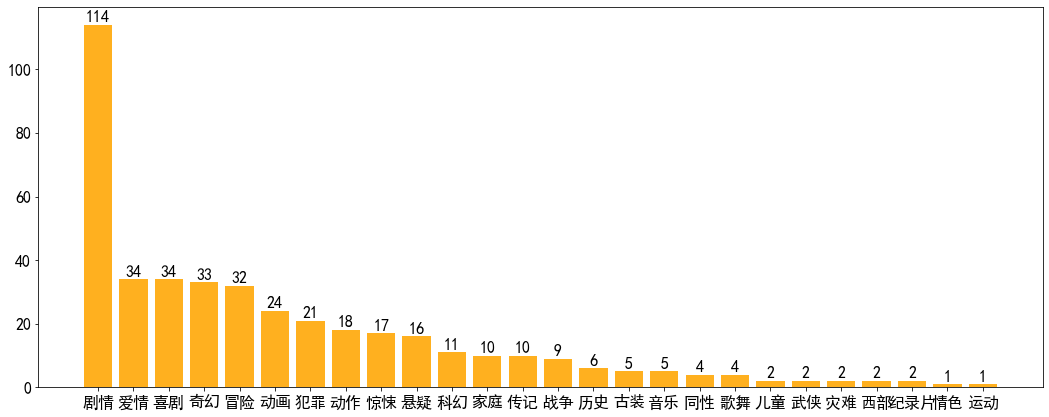

In [31]:
xs =df_theme1["theme"]
ys = df_theme1["freq"]
plt.figure(figsize=(18,7))
plt.bar(xs, ys, color='#ffb01f')
# html color codes   https://html-color.codes/
#plt.xticks(rotation=45)
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_theme.jpg",dpi=600)    #保存图片到本地
plt.show()

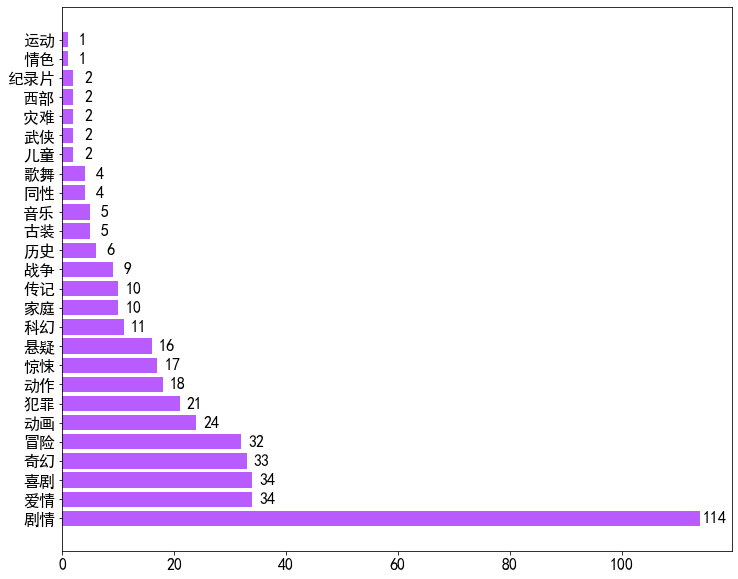

In [32]:
plt.figure(figsize=(12,10))
plt.barh(xs, ys,color='#b85cff')
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_theme2.jpg",dpi=600)    #保存图片到本地   
plt.show()

In [33]:
agg_year=df1.groupby("ryear")[['rating']].agg('mean')
agg_year['year']=agg_year.index
print(agg_year.columns)
agg_year.head(5)

Index(['rating', 'year'], dtype='object')


rating  year
ryear              
1936      9.3  1936
1939      9.3  1939
1953      9.0  1953
1954      9.3  1954
1957      9.5  1957

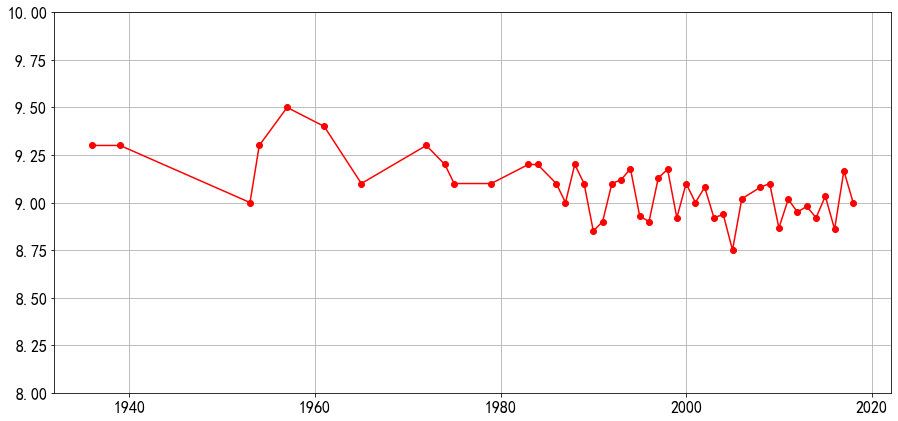

In [35]:
plt.figure(figsize=(15,7))
xs=agg_year['year']
ys=agg_year['rating']
plt.plot(xs, ys,color='red', marker='o')
plt.grid(True)
plt.ylim(8, 10)   
plt.savefig("D:\\pydata\\douban\\movie_rating_yearly.jpg",dpi=600)    #保存图片到本地   
plt.show()

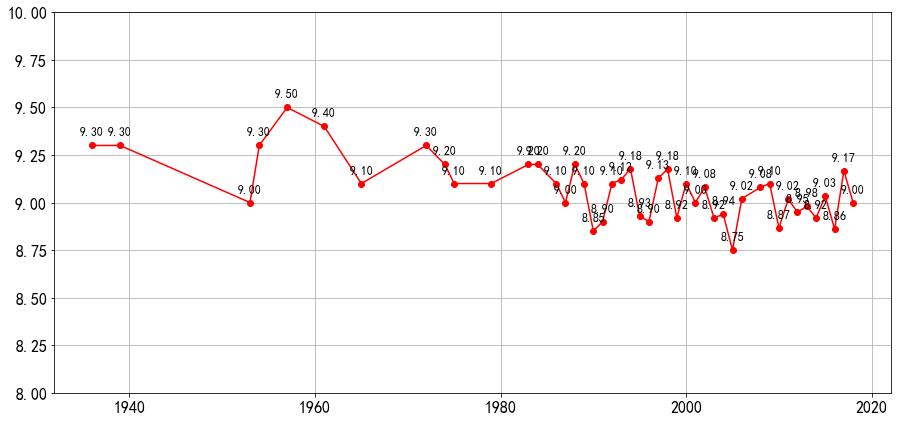

In [40]:
plt.figure(figsize=(15,7))
xs=agg_year['year']
ys=agg_year['rating']
plt.plot(xs, ys,color='red', marker='o')
plt.grid(True)
plt.ylim(8, 10)

for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',# horizontal alignment can be left, right or cent
                fontsize=12) 
plt.savefig("D:\\pydata\\douban\\movie_rating_yearly2.jpg",dpi=600)    #保存图片到本地                   
plt.show()

In [41]:
df_country1.shape

(27, 3)

In [42]:
df_country1['rating']=0.0
for i in range(0,27):
    temp=0.0
    for j in range(1,151):
        if df_country1.country[i] in df1.country[j]:
            temp=temp + df1.rating[j]
            #print(temp)
    df_country1.rating[i] = round(temp / df_country1.freq[i],3)

<ipython-input-42-dab75225a517>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country1.rating[i] = round(temp / df_country1.freq[i],3)


In [39]:
df_country1

country  freq  rating
0       美国    84   9.029
1       日本    22   9.018
2       英国    19   9.037
3     中国香港    15   8.953
4     中国大陆    14   9.121
5       法国    12   9.050
6       德国     9   9.011
7       韩国     9   8.956
8      意大利     8   9.175
9      加拿大     6   9.083
10     新西兰     3   9.167
11    澳大利亚     3   9.000
12      瑞士     3   9.100
13    中国台湾     3   9.100
14      印度     2   9.100
15      瑞典     2   9.000
16     黎巴嫩     1   9.100
17     卡塔尔     1   9.100
18      荷兰     1   8.900
19      波兰     1   9.200
20      丹麦     1   9.100
21      巴西     1   8.900
22     奥地利     1   8.800
23      伊朗     1   9.200
24     西班牙     1   8.800
25     墨西哥     1   9.400
26    塞浦路斯     1   9.100

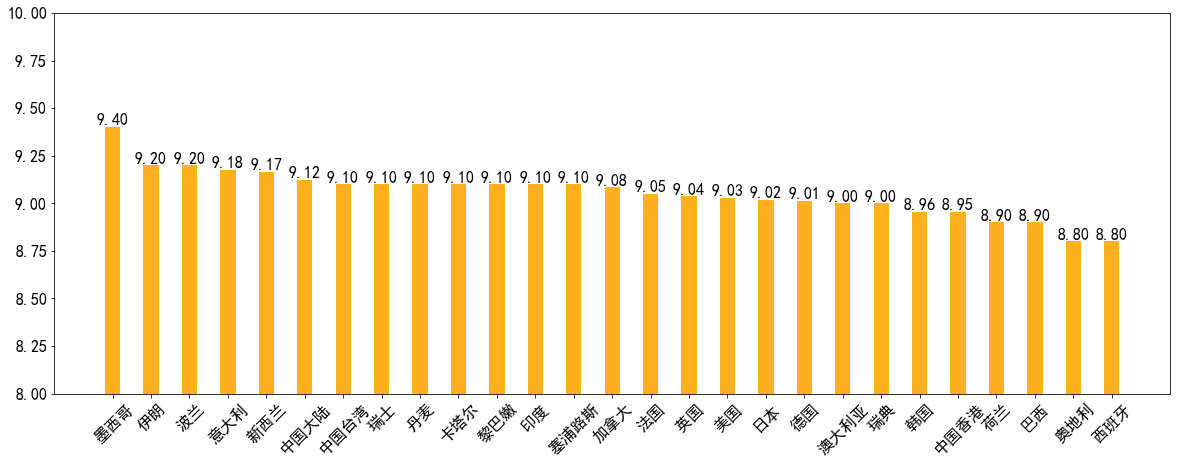

In [43]:
df_country2 = df_country1.sort_values('rating', ascending=False)
xs =df_country2["country"]
ys = df_country2["rating"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)
plt.ylim(8, 10)

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_rating_region.jpg",dpi=600)    #保存图片到本地   
plt.show()

In [44]:
df_theme1.shape

(26, 2)

In [45]:
df_theme1['rating']=0.0
for i in range(0,26):
    temp=0.0
    for j in range(1,151):
        if df_theme1.theme[i] in df1.theme[j]:
            temp=temp + df1.rating[j]
            #print(temp)
    df_theme1.rating[i] = round(temp / df_theme1.freq[i],3)

<ipython-input-45-b91d8f4eb81a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theme1.rating[i] = round(temp / df_theme1.freq[i],3)


In [355]:
df_theme1

freq theme  rating
剧情    114    剧情   9.058
爱情     34    爱情   8.997
喜剧     34    喜剧   8.965
奇幻     33    奇幻   8.967
冒险     32    冒险   8.991
动画     24    动画   9.008
犯罪     21    犯罪   9.067
动作     18    动作   8.967
惊悚     17    惊悚   8.894
悬疑     16    悬疑   8.931
科幻     11    科幻   9.055
家庭     10    家庭   9.050
传记     10    传记   9.030
战争      9    战争   9.133
历史      6    历史   9.167
音乐      5    音乐   9.160
古装      5    古装   8.860
歌舞      4    歌舞   9.075
同性      4    同性   9.050
灾难      2    灾难   9.000
武侠      2    武侠   8.700
西部      2    西部   8.850
儿童      2    儿童   8.950
纪录片     2   纪录片   9.400
运动      1    运动   9.000
情色      1    情色   8.900

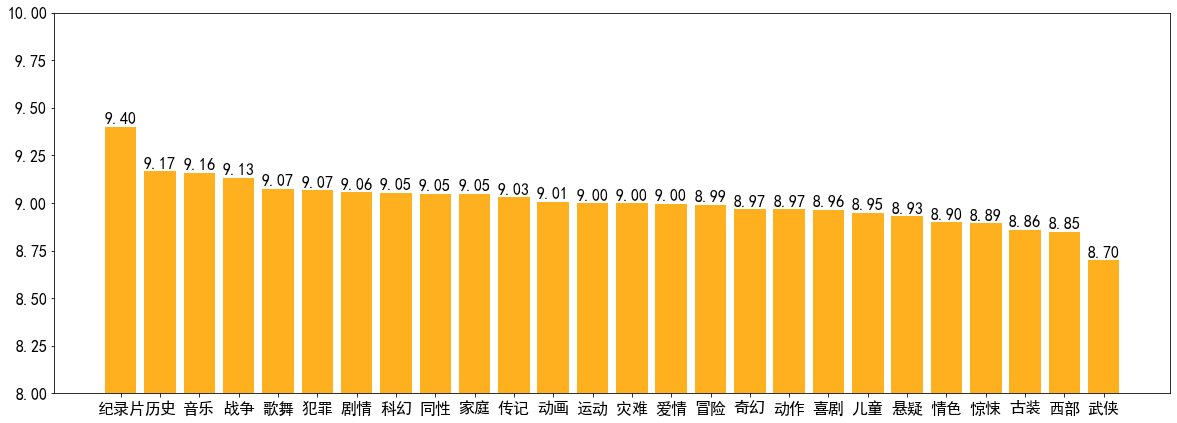

In [46]:
df_theme2 = df_theme1.sort_values('rating', ascending=False)
xs =df_theme2["theme"]
ys = df_theme2["rating"]
plt.figure(figsize=(20,7))
plt.bar(xs, ys, color='#ffb01f')
plt.ylim(8, 10)
# html color codes   https://html-color.codes/
#plt.xticks(rotation=45)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig("D:\\pydata\\douban\\movie_rating_theme.jpg",dpi=600)    #保存图片到本地   
plt.show()